In [1]:
import torch
import numpy as np
import slam
import nerf
import matplotlib.pyplot as plt
from importlib import reload
from torch.utils.data import DataLoader
import pandas as pd
torch.set_printoptions(linewidth=1000)

xFormers not available
xFormers not available


In [2]:
model, matching = slam.get_models()

Loaded SuperPoint model
Loaded SuperGlue model ("indoor" weights)


In [1]:
image_prefix = "indoor2"

In [3]:
reload(slam)
data = slam.training_preprocessor(
    image_prefix=image_prefix, 
    model=model,
    matching=matching,
    force_reload=False)

In [7]:
data_loader = DataLoader(data, batch_size=2**14, shuffle=True)

In [8]:
nerf_model = nerf.NeRFModel()

In [9]:
# nerf.train(model=nerf_model, data_loader=data_loader)
# torch.save(nerf_model, f"./nerf_model_{image_prefix}.pt")

In [37]:
nerf_model = torch.load(f"./nerf_model_{image_prefix}.pt")

In [45]:
reload(nerf)
reload(slam)
data = slam.inference_preprocessor(position=np.array([0,0,0]), direction=np.array([0,0,1]))
inference_dataloader = DataLoader(data, 2**14, shuffle=False)

Rotation: 
[[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]


Inference Progress: 100%|██████████| 17/17 [00:36<00:00,  2.17s/batch]

torch.Size([268324, 64, 3])
torch.Size([268324, 64])
torch.Size([268324, 64])


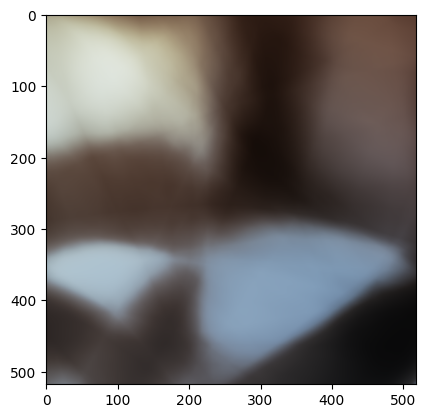

In [46]:
reload(nerf)
img = nerf.infer(model=nerf_model, data_loader=inference_dataloader)
plt.imshow(img)